### Analyzing the running time of algorithms

We'll use sorting algorithms to demonstrate the need to carefully consider algorithm running time.


In [1]:
def bubble_sort(array) :
    for passes in range(len(array)-1, 0, -1):
        for i in range(passes):
            if array[i]>array[i+1]:
                array[i],array[i+1] = array[i+1],array[i]
    return array
bubble_sort([53,2,1,3,5])

[1, 2, 3, 5, 53]

We can use the built in ```%timeit``` magic function in jupyter to compare the execution time of Python code.

In [2]:
import random
array = list(range(2000))
random.shuffle(array)
%timeit -n 1 -r 1 array.sort()


1 loop, best of 1: 589 µs per loop


In [3]:
array = list(range(2000))
random.shuffle(array)
%timeit bubble_sort(array)

1 loop, best of 3: 176 ms per loop


Clearly Python's sort method is faster than bubble sort.  But how does timing vary with the size of the array?

Text(0.5,0,'problem size')

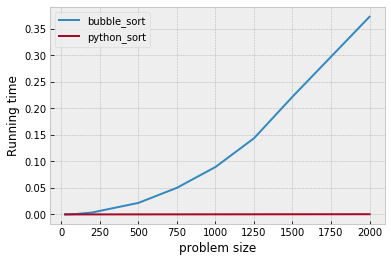

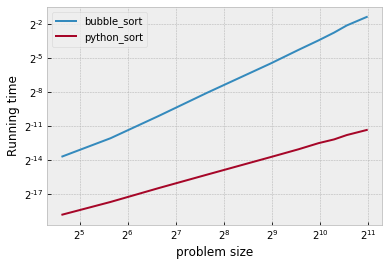

In [4]:
import timeit
import random
import time
def bubble_sort_test(size) :
    times = []
    num_tests = 3
    for i in range(num_tests) :    
        array = list(range(size))
        random.shuffle(array)
        t0=time.time()
        bubble_sort(array)
        times.append(time.time() - t0)
    return sum(times)/num_tests

def python_sort_test(size) :
    times = []
    num_tests = 1000
    for i in range(num_tests) :
        array = list(range(size))
        random.shuffle(array)
        t0=time.time()
        array.sort()
        times.append(time.time() - t0)
    return sum(times)/num_tests

problem_sizes = [25,50,100,200,500,750,1000,1250,1500,2000]
bubble_sort_running_times = []
python_sort_running_times = []
for size in problem_sizes :
    bubble_sort_running_times.append(bubble_sort_test(size))
    python_sort_running_times.append(python_sort_test(size))

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

plt.figure()
plt.plot(problem_sizes, bubble_sort_running_times,
         label = 'bubble_sort')
plt.plot(problem_sizes, python_sort_running_times,
         label = 'python_sort')

plt.legend(loc=0)
plt.ylabel('Running time')
plt.xlabel('problem size')

plt.figure()
plt.loglog(problem_sizes, bubble_sort_running_times,
         label = 'bubble_sort', basex=2,basey=2)
plt.loglog(problem_sizes, python_sort_running_times,
         label = 'python_sort', basex=2,basey=2)

plt.legend(loc=0)
plt.ylabel('Running time')
plt.xlabel('problem size')



In the next couple of lectures we will discuss a framework for analyzing the running time of algorithms, called **big O**. 

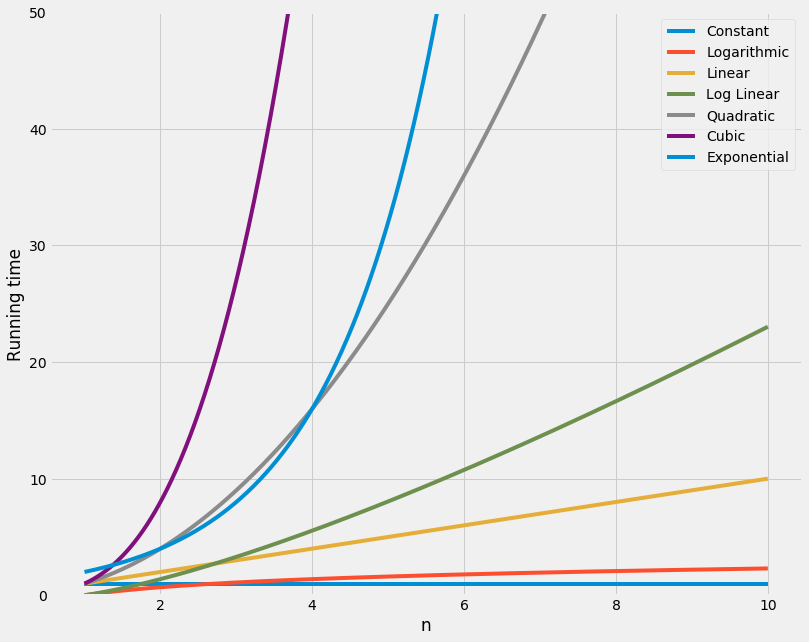

In [5]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])

plt.legend(loc=0)
plt.ylabel('Running time')
plt.xlabel('n')
plt.savefig('running_time.pdf')